# Numeraire
- what is numerarire --> When we deal with different goods or financial instruments, we need a numeraire to compare them or to express their prices or values
- When pricing financial derivatives, we choose a numeraire to change the probability measure
- Cash as a Numeraire
    - simplest case
- Stock X as a Numeraire
    - prices of all stocks are quoted as " certain number of stock X "
- Money Market Account as a Numeraire
    - The value of any asset can be expressed as the present value of its future cash flows, discounted by the money market account that grows at risk free rate

# Numeraire & martingale
- all tradable assets when priced in units of the numeraire asset must be martingales. This is a consequence of the no-arbitrage condition in a frictionless market.
- An asset is not a martingale under a particular measure if its expected growth rate is not zero when priced in units of the numeraire associated with that measure. This typically occurs when the numeraire and the asset have different risk characteristics or when the numeraire is not the risk-free asset.
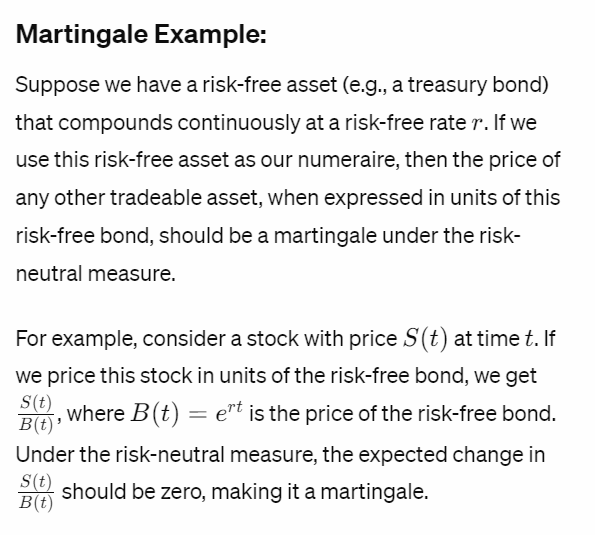
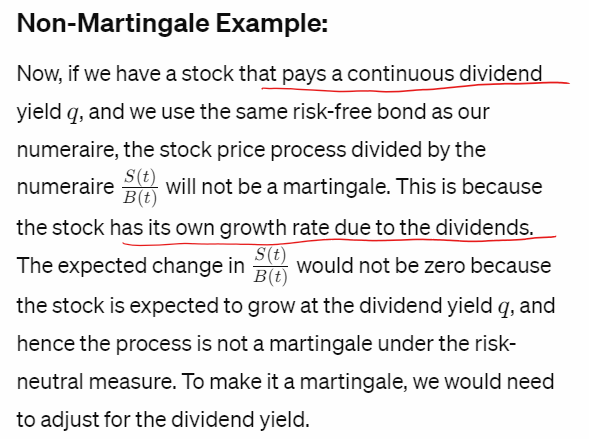

### For a rebased asset (in terms of a numeraire) to be martingale,   the expected rate of return of rebased asset per numeraire is zero. This is not necessarily saying that the growth rates are the same, but rather that there is no expected gain or loss if you hold the rebased asset.
- when we choose risk free bond as numeirare, and under risk neutral q measure, there is no arbittrage opportunity between risk free rate and all assets, hence E[rebased assets /  numeirare] is martingale and hence it is just hapepn that we lead to the conclusion that the rebased asset also grow at risk free rate

# Change of Numeraire technique
- Using a numeraire helps us shift between different probability measures, which is a cornerstone of the modern pricing theory, known as the Change of Numeraire technique
- The idea is to make complex pricing problems simpler by choosing a numeraire that turns the pricing into an expectation under the associated risk-neutral measure.
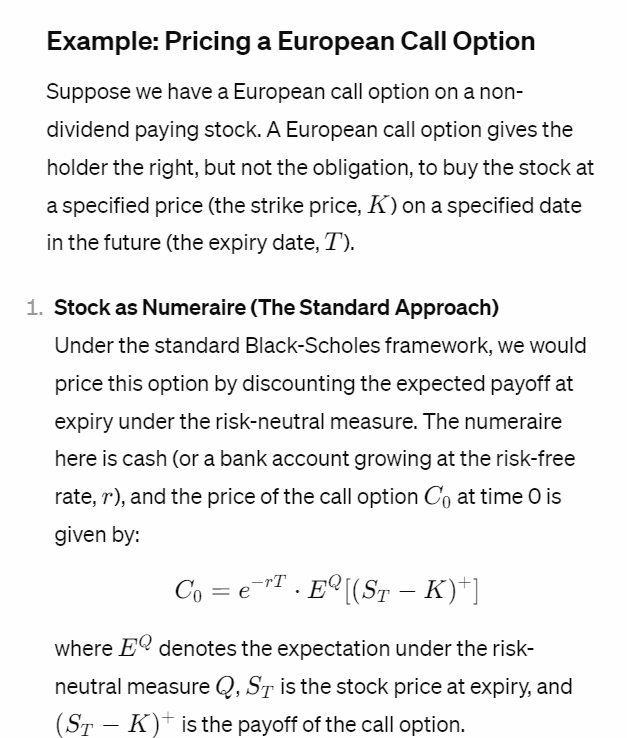
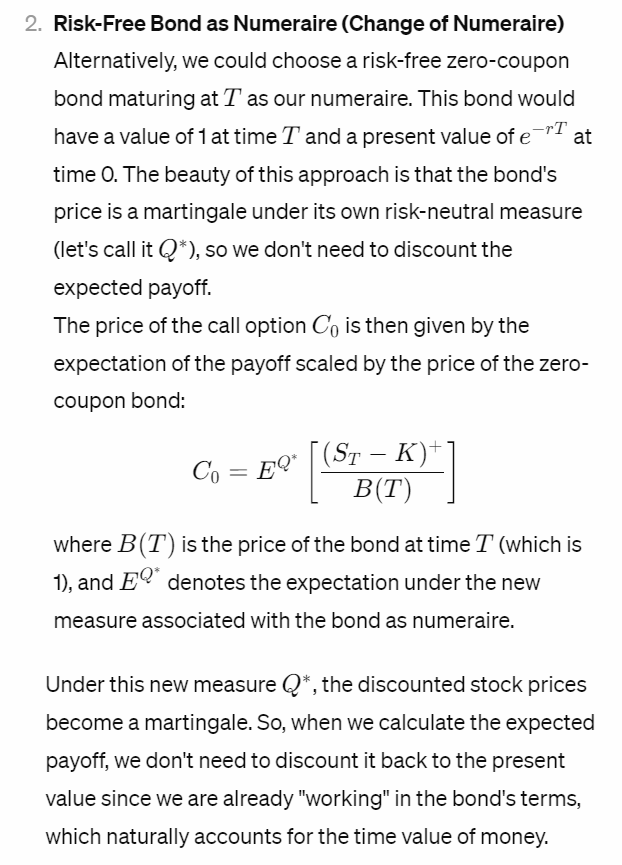


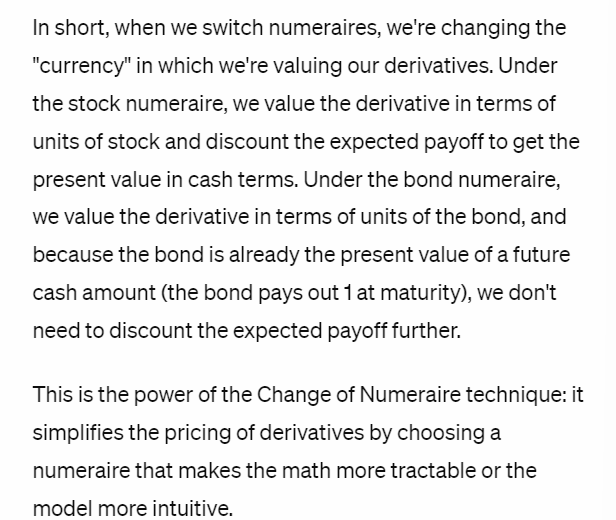

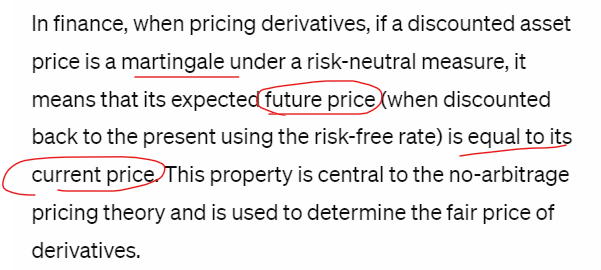

# LIBOR Market Model (LMM)
- model the movement of the LIBOR interest rates

# Caplet
- caplet is to protect against interest rate exceeding certain level. If the caplet on libor is 3%, and actual libor rise to 4%, then you receive the difference of 1%
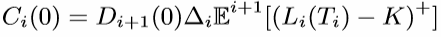

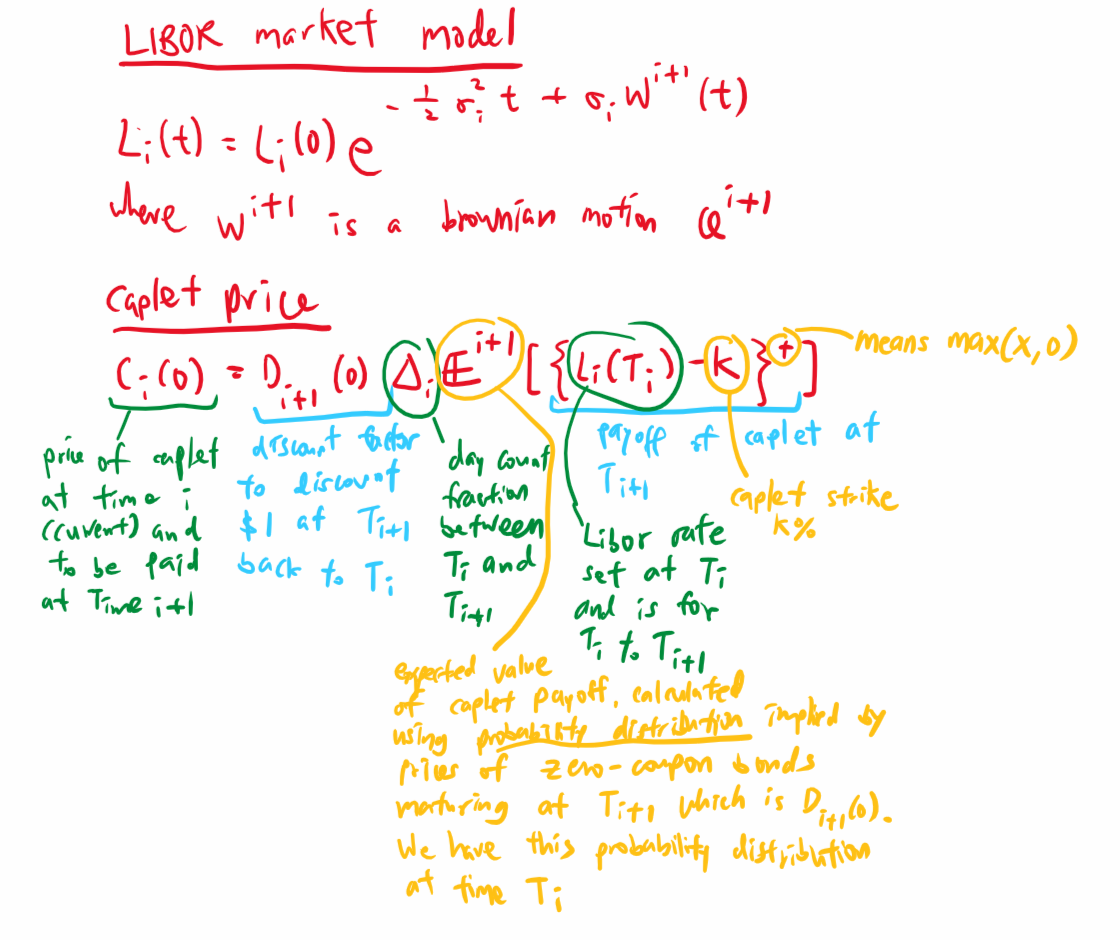

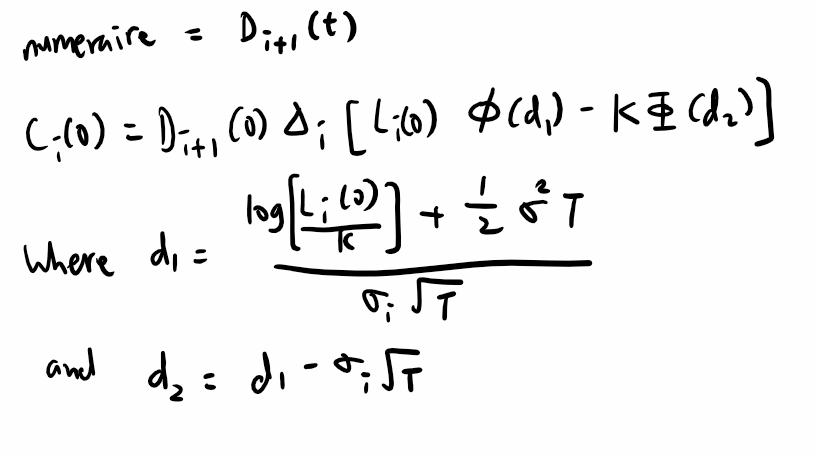

# Swap market model
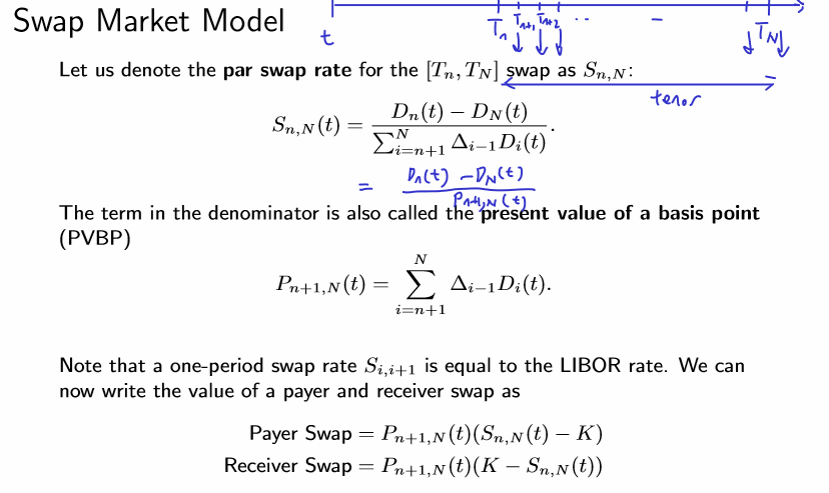
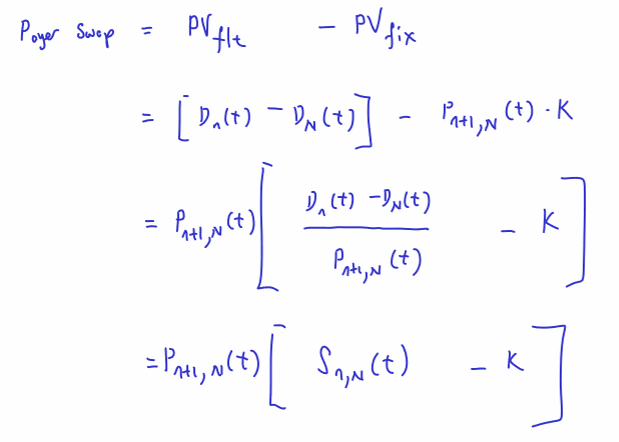

# Pricing a swaption
- option on swaps
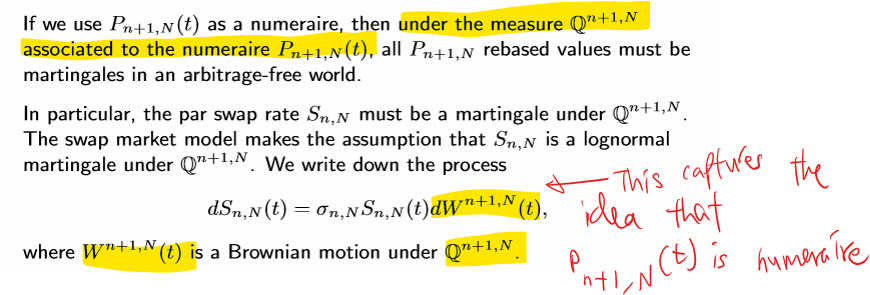
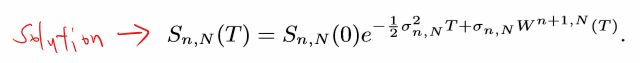

# Pricing a payer swaption
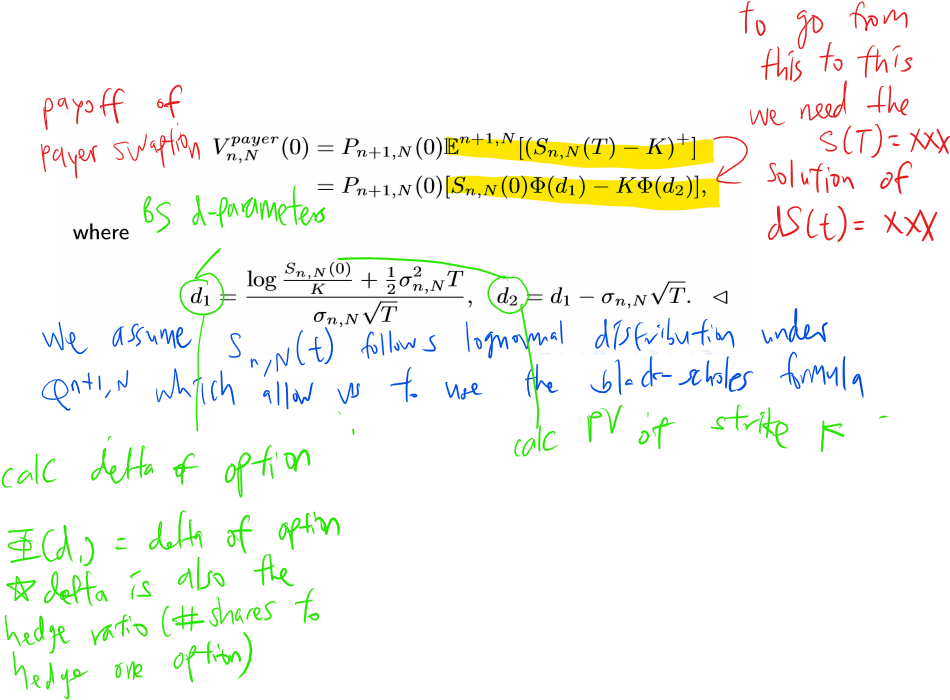

 # Swaption price under black76 lognormal and black76 normal
- calibration means to find the best model with the best adjusted paramters to best match the observed prices
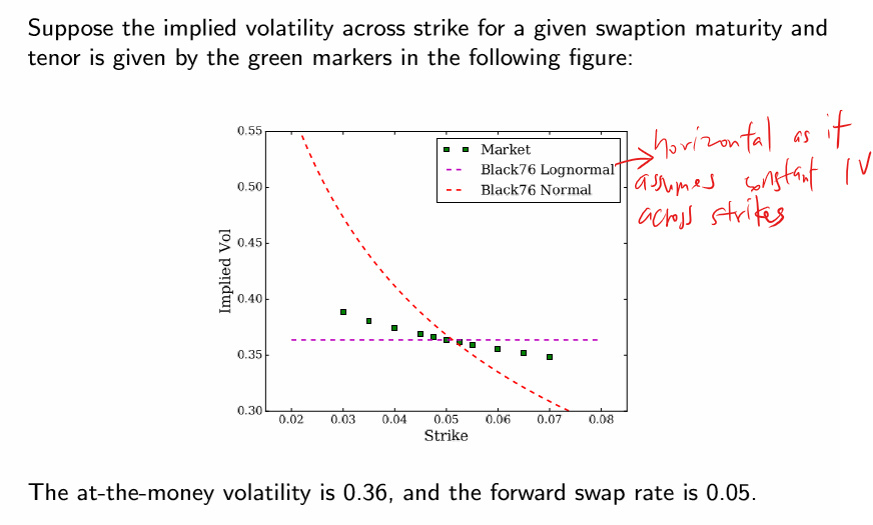

# Swaption price under displaced-diffusion model
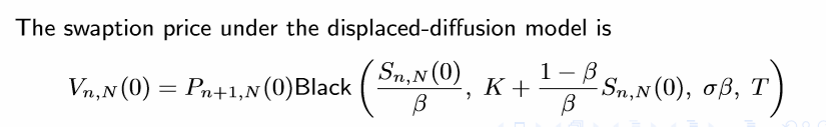
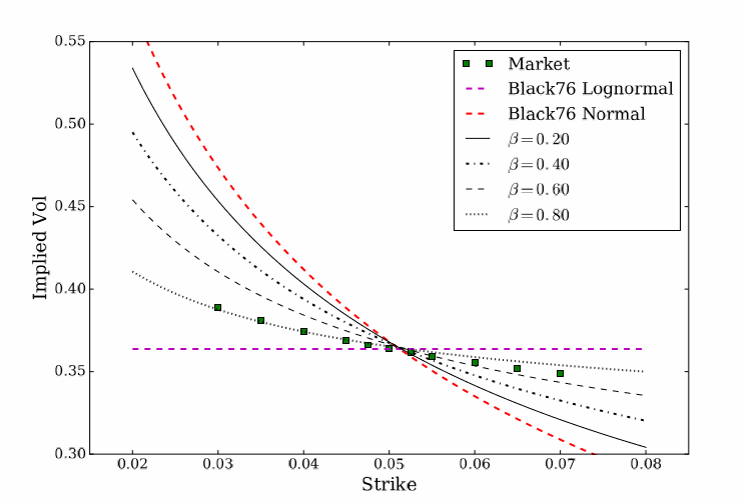

# Swaption price under SABR model
- sabr captures the volatility smile, while black76 lognormal, black76 normal and displaced diffusion model captures only volatility skew
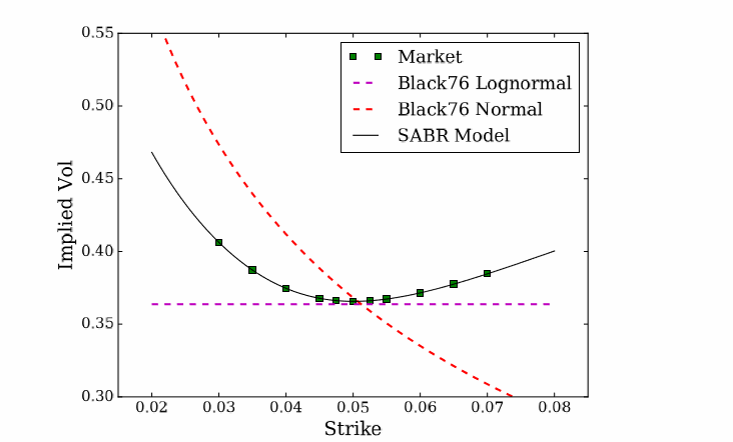

# Models for calibration
- reporting model is always the black scholes model
    - use BS model to price options for reporting (i.e. accounting an regulatory) purpose
- the pricing model can be any model
    - used by traders to price options on a daily basis to best capture market price
    
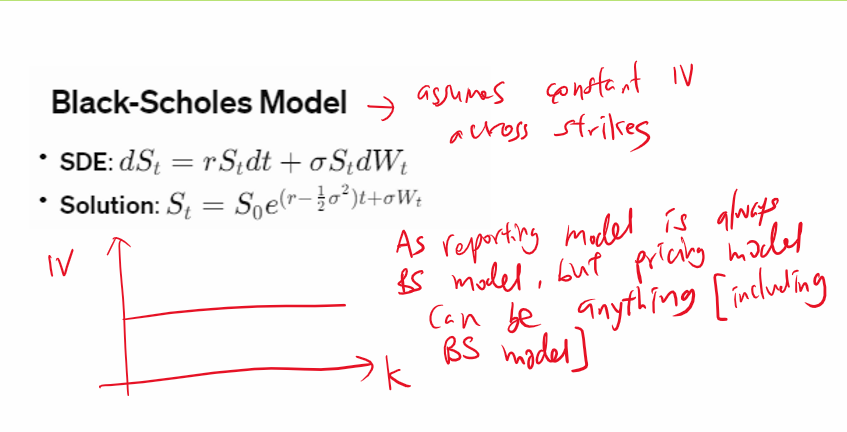
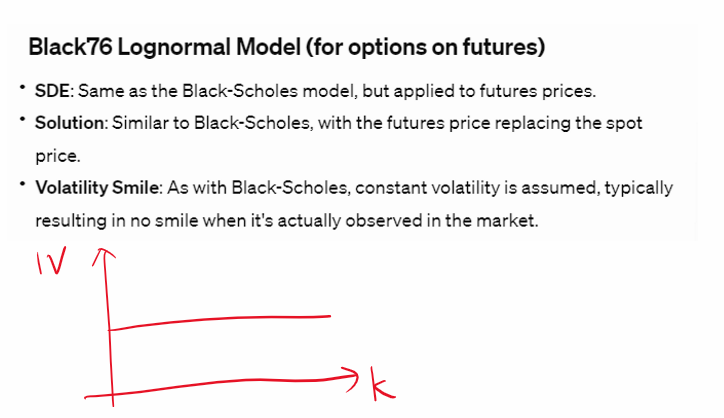
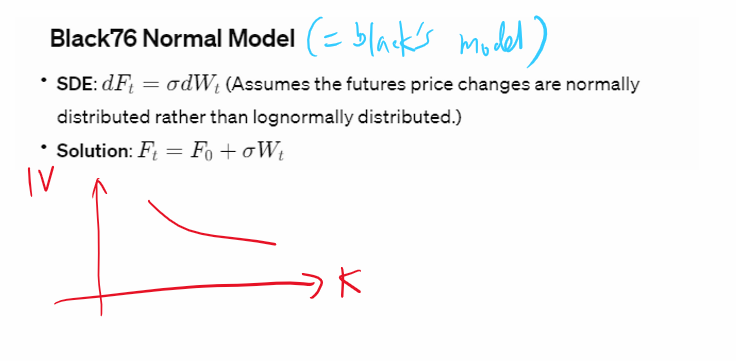
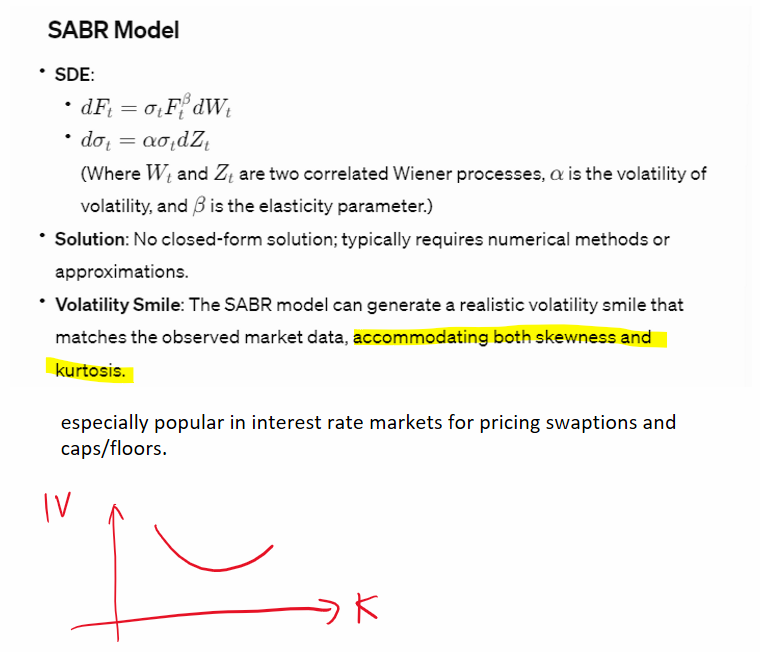
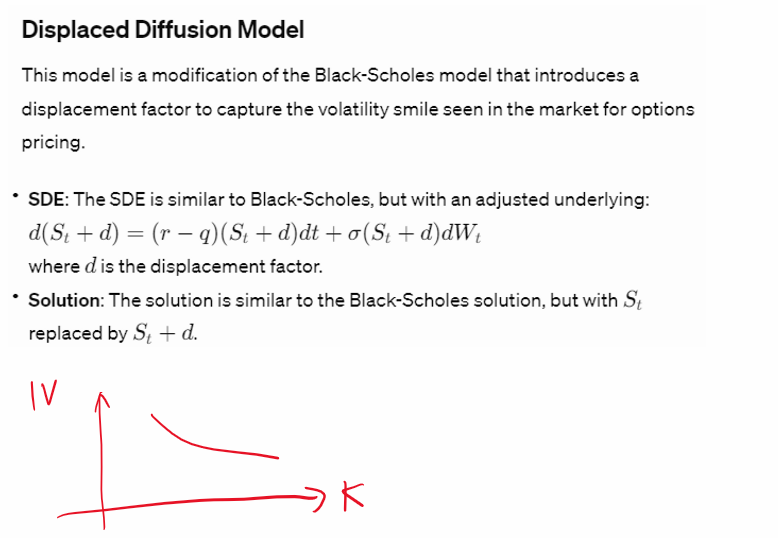
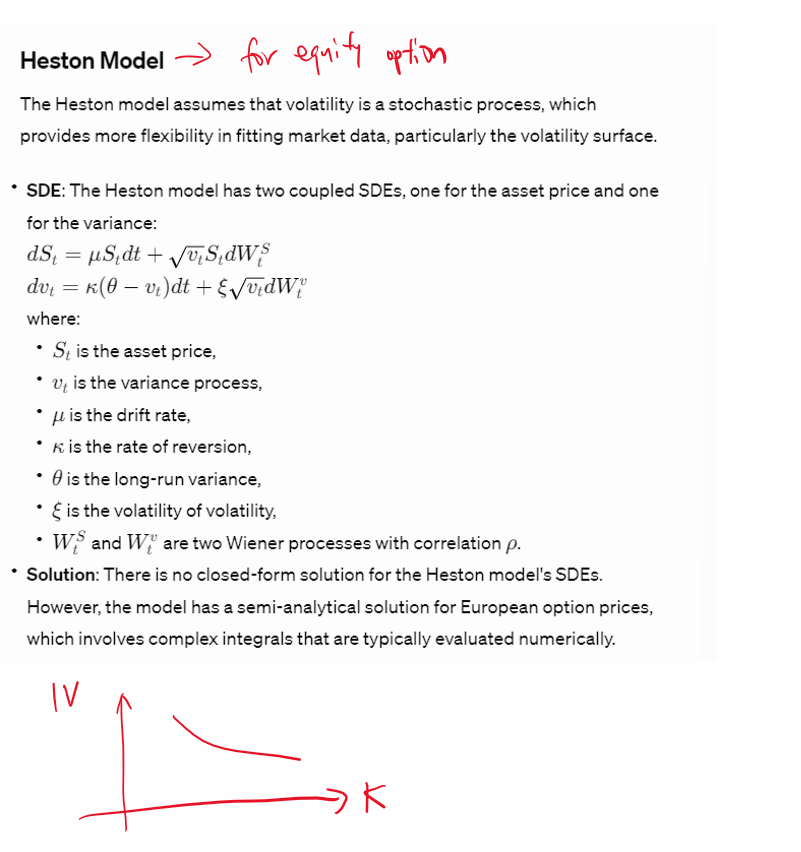
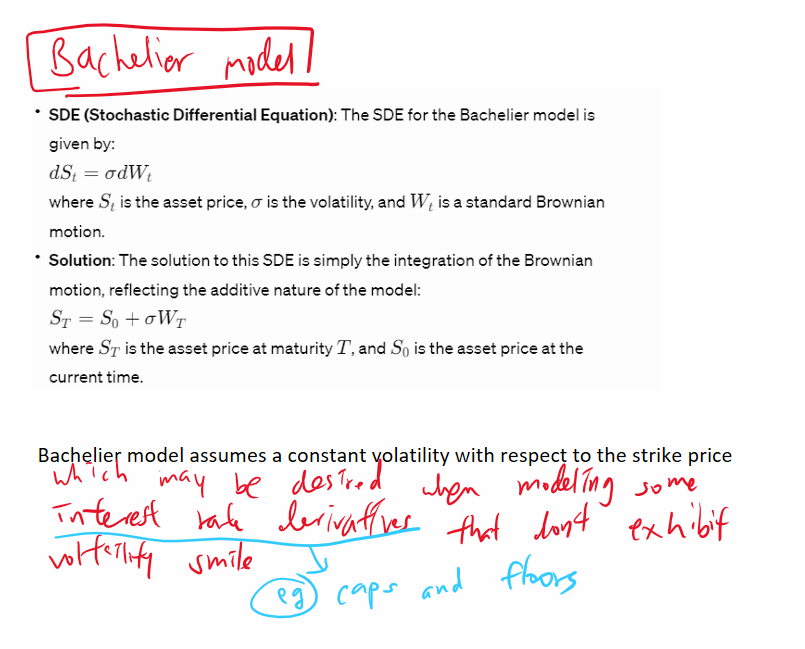

# black scholes as pricing model
- original BS model assume constant volatility across strikes and time, and this assumption is not realistic hence many models (like sabr) has been developed

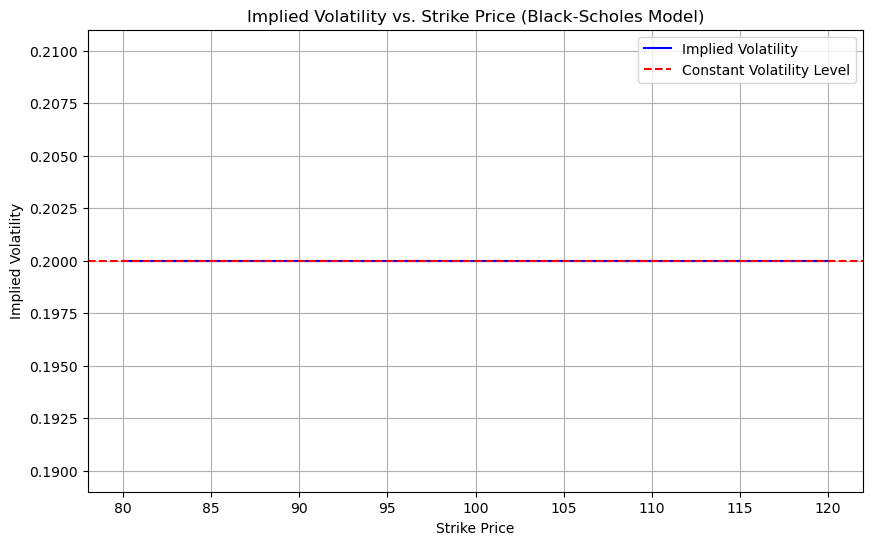

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Formula for European Call Option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

# Market parameters
S = 100  # Underlying asset price
Ks = np.linspace(80, 120, 100)  # Range of strike prices
T = 1  # Time to maturity in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility (assumed constant)

# Calculate the Black-Scholes call price for different strikes
call_prices = [black_scholes_call(S, K, T, r, sigma) for K in Ks]

# Calculate the implied volatility (which in this case is the constant volatility)
implied_vols = [sigma] * len(Ks)  # Synthetic data for constant volatility

# Plot the constant implied volatility across strikes
plt.figure(figsize=(10, 6))
plt.plot(Ks, implied_vols, label='Implied Volatility', color='blue')
plt.axhline(y=sigma, color='red', linestyle='--', label='Constant Volatility Level')
plt.title('Implied Volatility vs. Strike Price (Black-Scholes Model)')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


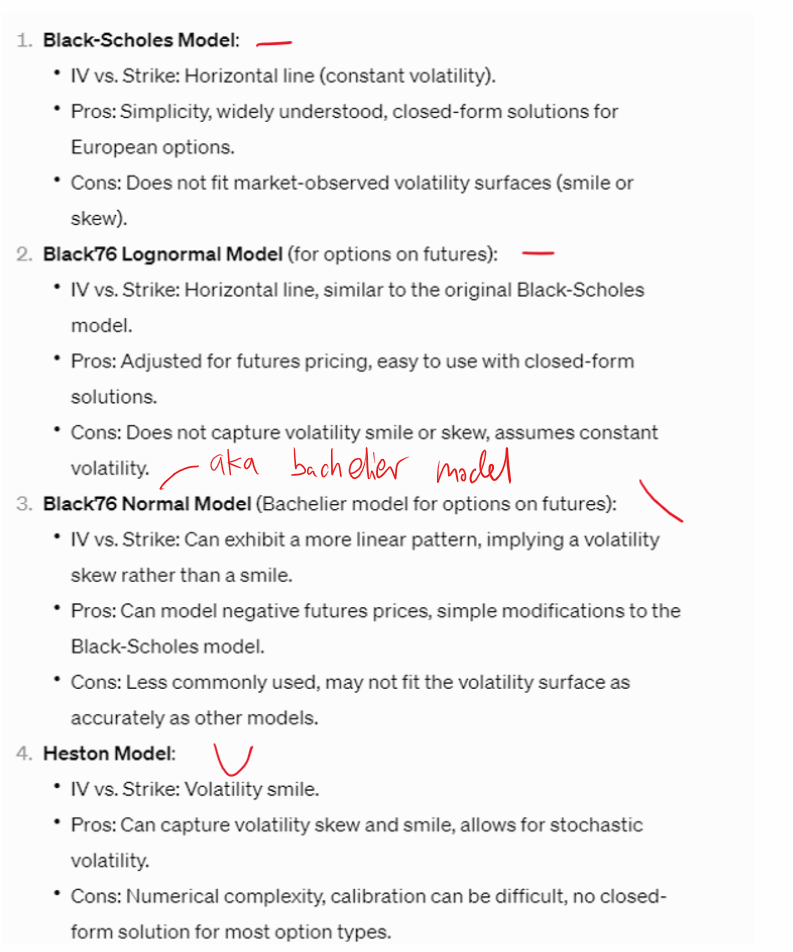
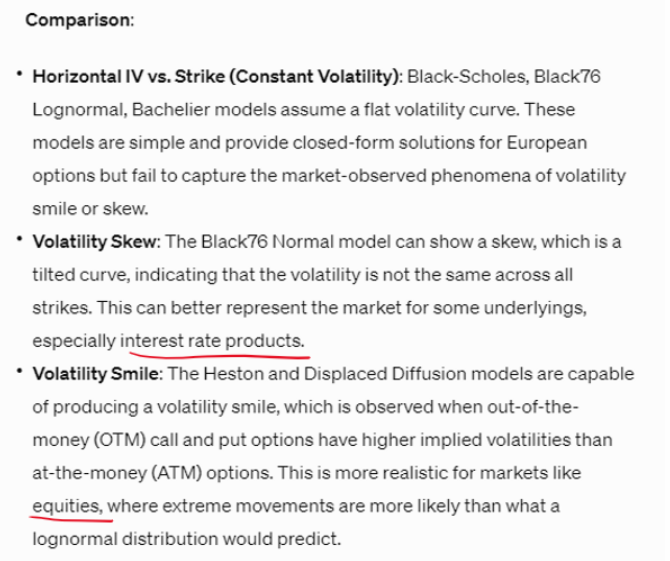

# BS v.s. black76 lognormal v.s. black76 normal 
- black76 lognormal is a modification of BS model for pricing on futures rather than on stocks. **It assumes that the returns of the underlying futures prices are lognormally distributed, which means it models the percentage changes in prices rather than absolute changes**. The lognormal distribution is skewed right and cannot handle negative values, which is suitable for assets that cannot go negative, like most stocks and commodities.
- black76 normal (aka bachelier model) assumes absolute changes in the futures prices are normally distributed